In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets

data = datasets.load_iris()
iris = pd.DataFrame(data.data)
iris['species'] = data.target
iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Scatter Plot for Whole Dataset

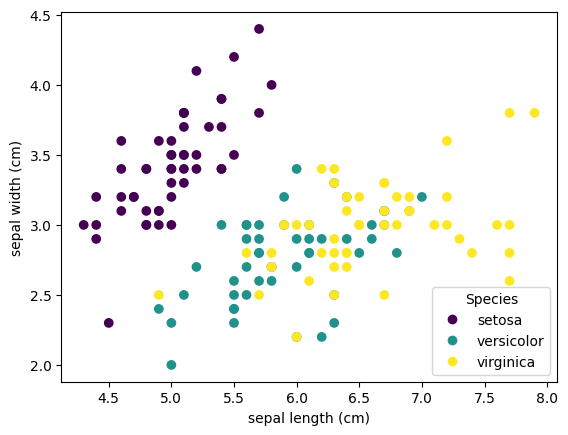

In [4]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax.set(xlabel=data.feature_names[0], ylabel=data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Species"
)

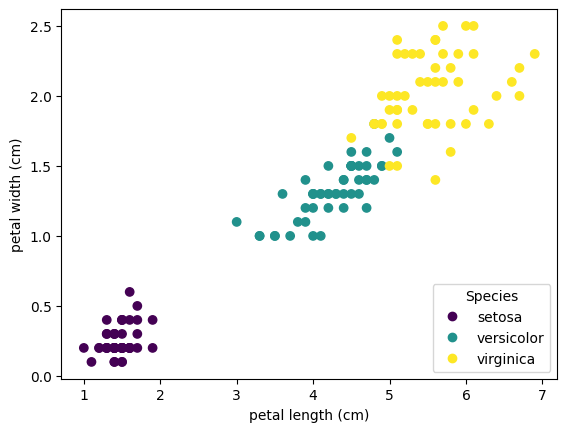

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(data.data[:, 2], data.data[:, 3], c=data.target)
ax.set(xlabel=data.feature_names[2], ylabel=data.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Species"
)


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
iris.iloc[86]

sepal_length    6.7
sepal_width     3.1
petal_length    4.7
petal_width     1.5
species         1.0
Name: 86, dtype: float64

In [9]:
iris.iloc[125]

sepal_length    7.2
sepal_width     3.2
petal_length    6.0
petal_width     1.8
species         2.0
Name: 125, dtype: float64

Create Test Set

In [10]:
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
train_set, test_set = train_test_split(iris, test_size=0.2, random_state = 42)

In [11]:
X_train = train_set[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train_set[['species']]

In [12]:
X_test = test_set[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test_set[['species']]

Create ML Models - Decisions Tree, Random Forest, KNN

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

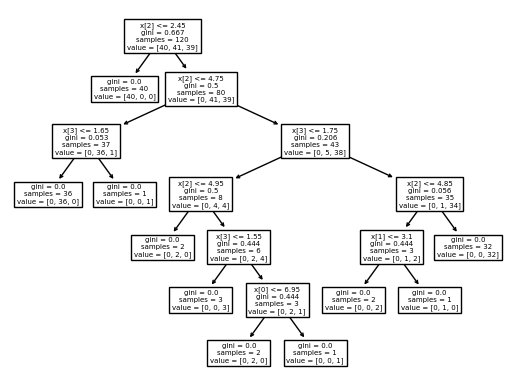

In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

<ipython-input-14-1fe8f1962f70>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

Evaluate Models Using Accuracy Score and F1 Score

In [16]:
#Accuracy Score
from sklearn.model_selection import cross_val_score
y_train_copy = y_train
y_train_copy = y_train_copy.to_numpy()
y_train_copy = y_train_copy.ravel()
print(f"Decision Tree: {cross_val_score(clf, X_train, y_train_copy, cv=4, scoring='accuracy')}")
print(f"Random Forest Classifier: {cross_val_score(rfc, X_train, y_train_copy, cv=4, scoring='accuracy')}")
print(f"KNN: {cross_val_score(knn, X_train, y_train_copy, cv=4, scoring='accuracy')}")

print("\nTesting Results")
y_pred_clf = clf.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Decision Tree: {accuracy_score(y_test, y_pred_clf) * 100}%")
print(f"Random Forest Classifier: {accuracy_score(y_test, y_pred_rfc)* 100}%")
print(f"KNN: {accuracy_score(y_test, y_pred_knn)* 100}%")

Decision Tree: [0.96666667 0.86666667 0.93333333 0.93333333]
Random Forest Classifier: [0.96666667 0.86666667 0.93333333 0.96666667]
KNN: [0.96666667 0.96666667 0.93333333 0.93333333]

Testing Results
Decision Tree: 100.0%
Random Forest Classifier: 100.0%
KNN: 100.0%


In [24]:
#F1 Score
from sklearn.metrics import f1_score
print(f"Decision Tree: {f1_score(y_test, y_pred_clf, average='macro')}")
print(f"Random Forest Classification: {f1_score(y_test, y_pred_rfc, average='macro')}")
print(f"KNN: {f1_score(y_test, y_pred_knn, average='macro')}")

Decision Tree: 1.0
Random Forest Classification: 1.0
KNN: 1.0
